In [1]:
import json
import os
import time
import ipyparallel as ipp

import matplotlib.pyplot as plt
import torch
import dfca as DFCA
import ifca as IFCA

import numpy as np

from util import *

Reads Config file and prepares the arguments you can choose in the config_dfca.json/config_ifca.json

In [2]:
rc = ipp.Cluster(n=3).start_and_connect_sync()
rc.activate()

rc.ids 

dview = rc[:]

Starting 3 engines with <class 'ipyparallel.cluster.launcher.LocalEngineSetLauncher'>


  0%|          | 0/3 [00:00<?, ?engine/s]

In [3]:
seeds = [11,12,13,14,15]
learning_rates = [0.1]

dfca_li = []
dfca_gi = []
ifca = []

In [4]:
%%px --targets all

import sys
import os
sys.path.append(os.getcwd())

seeds = [11,12,13,14,15]
learning_rates = [0.1]

dfca_li = []
dfca_gi = []
ifca = []

Running the dfca-gi experiment

In [5]:
%%px --target 0 --noblock
import dfca as DFCA
import json
import time
import torch
import numpy as np


with open("config_dfca_gi.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------DFCA-GI, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = DFCA.TrainMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_gi.append(res_mean)



<AsyncResult(%px): pending>

Running the dfca-li experiment


In [6]:
%%px --target 1 --noblock
import dfca as DFCA
import json
import time
import torch
import numpy as np


with open("config_dfca_li.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------DFCA-LI, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = DFCA.TrainMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_li.append(res_mean)



<AsyncResult(%px): pending>

Running the ifca experiment

In [7]:
%%px --target 2 --noblock
import ifca as IFCA
import json
import time
import torch
import numpy as np

with open("config_ifca.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------IFCA, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = IFCA.TrainMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    ifca.append(res_mean)



<AsyncResult(%px): pending>

## Results

DFCA-GI Experiment Outputs

In [8]:
rc.wait_interactive()
_.display_outputs()

dfca_gi = rc[0].pull('dfca_gi', block=True)
dfca_li = rc[1].pull('dfca_li', block=True)
ifca = rc[2].pull('ifca', block=True)

unknown:   0%|          | 0/3 [00:00<?, ?tasks/s]

---------------------------------IFCA, lr: 0.1, seed: 11---------------------------------
config: {'m': 2400, 'm_test': 400, 'p': 4, 'n': 100, 'uneven': True, 'h1': 200, 'num_epochs': 300, 'batch_size': 100, 'tau': 10, 'lr': 0.1, 'data_seed': 11, 'train_seed': 11, 'config_override': '', 'project_dir': 'output_ifca'}
Using device: cuda
Epoch -1 tr: l 2.291 a 0.117 clct[851, 530, 732, 287] cl_acc 0.410  6.142sec
Epoch -1 tst: l 2.292 a 0.115 clct[150, 78, 135, 37] cl_acc 0.403  1.126sec
Epoch 0 tr: l 2.191 a 0.283 clct[549, 586, 668, 597] cl_acc 0.819  lr 0.100000 15.691sec(train) 9.320sec(infer)
Epoch 0 tst: l 2.191 a 0.285 clct[91, 100, 116, 93] cl_acc 0.812  1.818sec
result written at output_ifca/results.pickle
checkpoint written at output_ifca/checkpoint.pt
Epoch 1 tr: l 1.944 a 0.577 clct[599, 602, 598, 601] cl_acc 0.991  lr 0.100000 16.602sec(train) 9.607sec(infer)
Epoch 1 tst: l 1.940 a 0.577 clct[100, 101, 101, 98] cl_acc 0.995  1.630sec
Epoch 2 tr: l 1.601 a 0.729 clct[600, 600,

DFCA-LI Experiment Outputs

In [9]:
__.display_outputs()

---------------------------------DFCA-LI, lr: 0.1, seed: 11---------------------------------
config: {'m': 2400, 'm_test': 400, 'p': 4, 'n': 100, 'uneven': True, 'local_model_init': True, 'h1': 200, 'num_epochs': 300, 'batch_size': 100, 'tau': 10, 'lr': 0.1, 'data_seed': 11, 'train_seed': 11, 'config_override': '', 'project_dir': 'output_dfca_li'}
Using device: cuda
Epoch -1 tr: l 2.292 a 0.122 clct[608, 605, 625, 562] cl_acc 0.273  11.553sec
Epoch -1 tst: l 2.292 a 0.140 clct[108, 102, 99, 91] cl_acc 0.318  9.027sec
Epoch 0 tr: l 2.234 a 0.262 clct[611, 625, 562, 602] cl_acc 0.275  lr 0.100000 37.122sec(train) 11.379sec(infer)
Epoch 0 tst: l 2.240 a 0.279 clct[87, 118, 86, 109] cl_acc 0.287  9.054sec
result written at output_dfca_li/results.pickle
checkpoint written at output_dfca_li/checkpoint.pt
Epoch 1 tr: l 2.241 a 0.237 clct[593, 606, 596, 605] cl_acc 0.285  lr 0.100000 36.803sec(train) 11.062sec(infer)
Epoch 1 tst: l 2.239 a 0.271 clct[87, 115, 97, 101] cl_acc 0.290  8.249sec
Ep

IFCA Experiment Outputs

In [10]:
___.display_outputs()

---------------------------------DFCA-GI, lr: 0.1, seed: 11---------------------------------
config: {'m': 2400, 'm_test': 400, 'p': 4, 'n': 100, 'uneven': True, 'local_model_init': False, 'h1': 200, 'num_epochs': 300, 'batch_size': 100, 'tau': 10, 'lr': 0.1, 'data_seed': 11, 'train_seed': 11, 'config_override': '', 'project_dir': 'output_dfca_gi'}
Using device: cuda
Epoch -1 tr: l 2.291 a 0.117 clct[851, 530, 732, 287] cl_acc 0.410  7.129sec
Epoch -1 tst: l 2.292 a 0.141 clct[150, 78, 135, 37] cl_acc 0.403  5.170sec
Epoch 0 tr: l 2.147 a 0.318 clct[637, 537, 709, 517] cl_acc 0.532  lr 0.100000 34.349sec(train) 9.818sec(infer)
Epoch 0 tst: l 2.170 a 0.305 clct[110, 82, 127, 81] cl_acc 0.492  7.884sec
result written at output_dfca_gi/results.pickle
checkpoint written at output_dfca_gi/checkpoint.pt
Epoch 1 tr: l 1.966 a 0.460 clct[668, 531, 515, 686] cl_acc 0.740  lr 0.100000 37.248sec(train) 10.371sec(infer)
Epoch 1 tst: l 2.005 a 0.427 clct[108, 91, 96, 105] cl_acc 0.705  6.718sec
Epo

## Plots

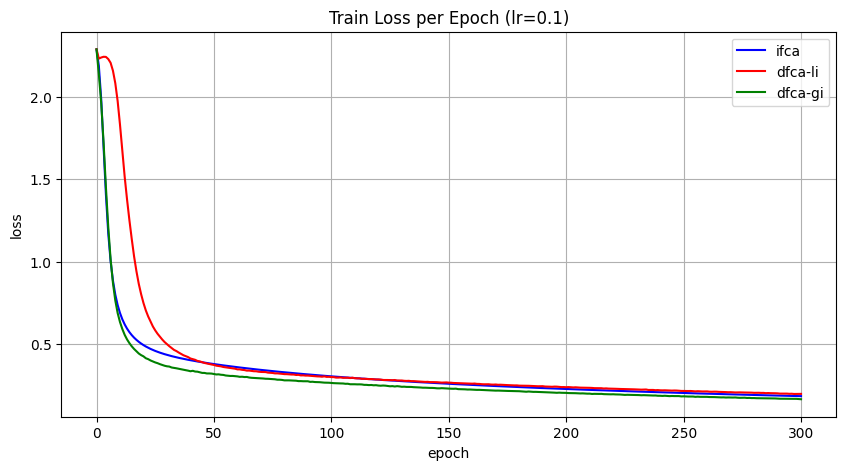

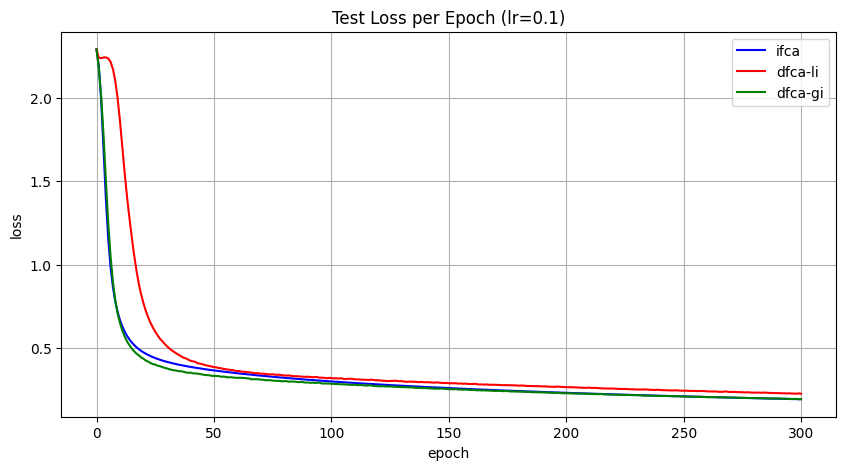

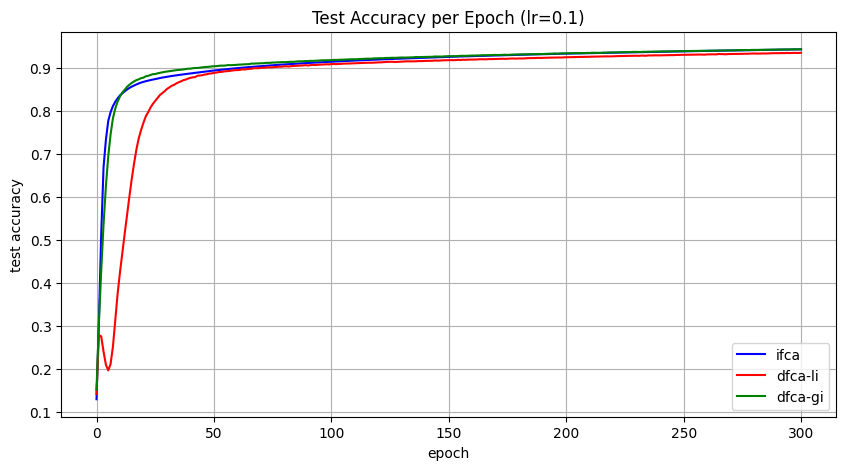

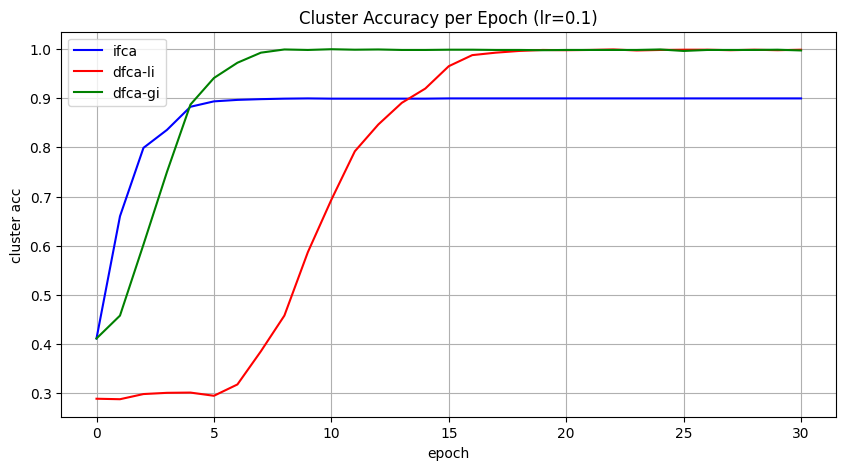

In [11]:

r_ifca = {}
r_dfca_gi = {}
r_dfca_li = {}

r_ifca['test_loss'] = []
r_ifca['test_acc'] = []
r_ifca['cl_acc'] = []
r_ifca['train_loss'] = []
for i in range(len(learning_rates)):
    r_ifca['test_loss'].append(ifca[i][0])
    r_ifca['test_acc'].append(ifca[i][1])
    r_ifca['cl_acc'].append(ifca[i][2])
    r_ifca['train_loss'].append(ifca[i][3])

r_dfca_gi['test_loss'] = []
r_dfca_gi['test_acc'] = []
r_dfca_gi['cl_acc'] = []
r_dfca_gi['train_loss'] = []
for i in range(len(learning_rates)):
    r_dfca_gi['test_loss'].append(dfca_gi[i][0])
    r_dfca_gi['test_acc'].append(dfca_gi[i][1])
    r_dfca_gi['cl_acc'].append(dfca_gi[i][2])
    r_dfca_gi['train_loss'].append(dfca_gi[i][3])


r_dfca_li['test_loss'] = []
r_dfca_li['test_acc'] = []
r_dfca_li['cl_acc'] = []
r_dfca_li['train_loss'] = []
for i in range(len(learning_rates)):
    r_dfca_li['test_loss'].append(dfca_li[i][0])
    r_dfca_li['test_acc'].append(dfca_li[i][1])
    r_dfca_li['cl_acc'].append(dfca_li[i][2])
    r_dfca_li['train_loss'].append(dfca_li[i][3])


os.makedirs('graphs', exist_ok=True)

for l in range(len(learning_rates)):

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['train_loss'][l], label='ifca', color='blue')
    plt.plot(r_dfca_li['train_loss'][l], label='dfca-li', color='red')
    plt.plot(r_dfca_gi['train_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Train Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '1_train_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_loss'][l], label='ifca', color='blue')
    plt.plot(r_dfca_li['test_loss'][l], label='dfca-li', color='red')
    plt.plot(r_dfca_gi['test_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Test Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '1_test_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_acc'][l], label='ifca', color='blue')
    plt.plot(r_dfca_li['test_acc'][l], label='dfca-li', color='red')
    plt.plot(r_dfca_gi['test_acc'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.title(f'Test Accuracy per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '1_test_acc.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['cl_acc'][l][:31], label='ifca', color='blue')
    plt.plot(r_dfca_li['cl_acc'][l][:31], label='dfca-li', color='red')
    plt.plot(r_dfca_gi['cl_acc'][l][:31], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('cluster acc')
    plt.title(f'Cluster Accuracy per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '1_cluster_acc.png'))